In [ ]:
# Data Preprocessing
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk

# Natural Language Processing
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from wordcloud import WordCloud

# Web Scraping
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By 

# URL and hightlight_mismatch function
from reviews_utils import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aldan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
sns.set_theme()

pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.precision', 2)

nltk.download('stopwords')

In [3]:
# Installing the Chrome Driver
SERVICE = Service(ChromeDriverManager().install())

# Setting it up
DRIVER = webdriver.Chrome(service=SERVICE)

# Navigate to the desired URL
DRIVER.get(URL)
time.sleep(5) 

# Extracting the BODY of the Website
BODY = DRIVER.find_element(By.TAG_NAME, "body")
time.sleep(5)

for i in range(10):
    BODY.send_keys(Keys.PAGE_DOWN)
    time.sleep(1)

In [4]:
# Reviews elements, includes date and review_text
reviews_elements = DRIVER.find_elements(By.CLASS_NAME, "apphub_CardTextContent")
# Exclude the date, just get the text
reviews = [r.text.split("\n")[1] for r in reviews_elements]

In [5]:
# Recommended or Not Recommended
recommendations_elements = DRIVER.find_elements(By.CLASS_NAME, "title")
recommendations = [r.text for r in recommendations_elements]

In [6]:
data_dict = {
    "reviews": reviews,
    "recommendation": recommendations
}

In [7]:
# Create a dataframe from the collected data
df = pd.DataFrame(data_dict)

In [8]:
# Define stop words for filtering out
stop_words_english = stopwords.words("english")

In [9]:
def process_review(review: str):
    """ Transform the review - text(str):

    1. Lower case
    2. Split into words
    3. Filter out the useless words using stop words
    4. Lemmatize the remaining words

    Arguments:
        review - text(str)

    Returns:
        Return words as full review(text)
    """
    review_lower = review.lower()
    review_lower_split = review_lower.split()
    review_processed_list = []

    for word in review_lower_split:
        if word not in stop_words_english:
            word_lemmatized = Word(word).lemmatize()
            review_processed_list.append(word_lemmatized)

    review_processed = " ".join(review_processed_list)

    return review_processed

In [10]:
# Apply the function to the column, row wise
df['reviews_processed'] = df['reviews'].apply(process_review)

In [11]:
# Filter out non-necessary columns
df = df[["reviews_processed", "recommendation"]]

In [12]:
df.head()

,reviews_processed,recommendation
0,░░░░░░░██████╗░███████╗███...,Recommended
1,mierda,Not Recommended
2,game good.,Recommended
3,я ненавижу и люблю эту игр...,Recommended
4,забавный шутер от первого ...,Recommended


# Word Frequency

In [13]:
# Count the frequency of each word
words_frequency = []

# For every review in the column, split into words and append to new list
for review in df['reviews_processed']:
    for word in review.split():
        words_frequency.append(word)

# Count frequency of the words in the words_frequency list, sort in descending order
words_in_review = sorted(
    words_frequency,
    key=words_frequency.count,
    reverse=True
)

# Unique words
len(words_in_review)

134

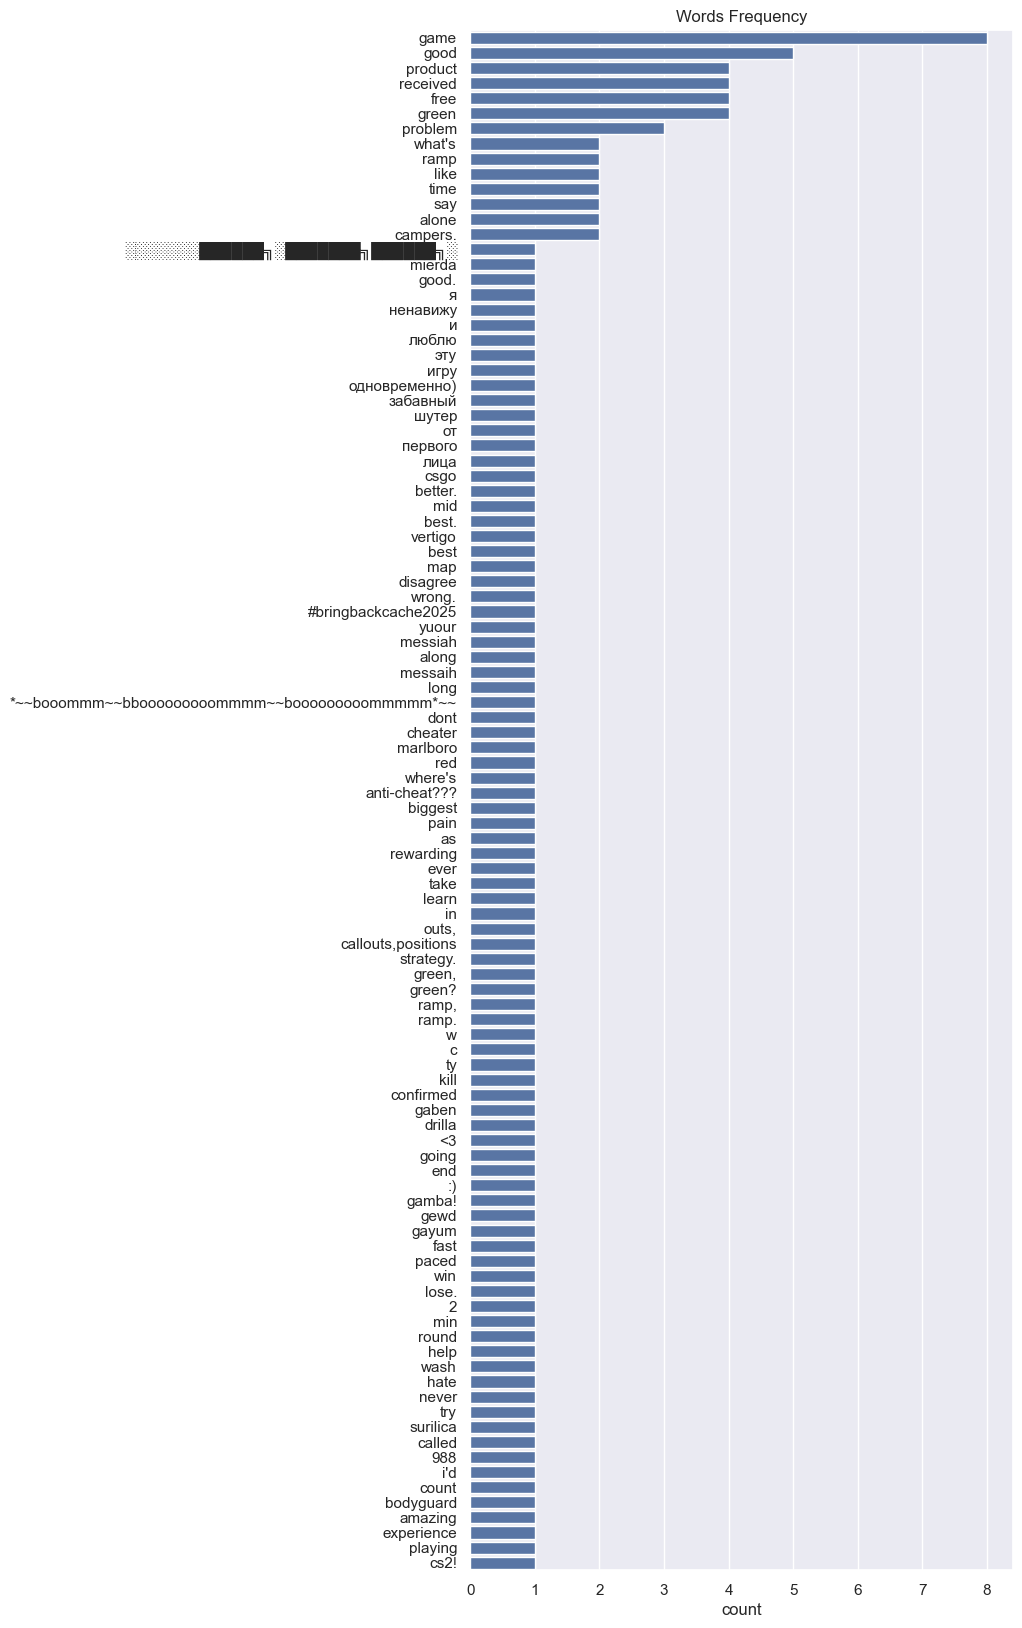

In [25]:
# Words frequency plot
plt.figure(figsize=[7,20])
plt.title("Words Frequency")
sns.countplot(y=words_in_review)
plt.show()

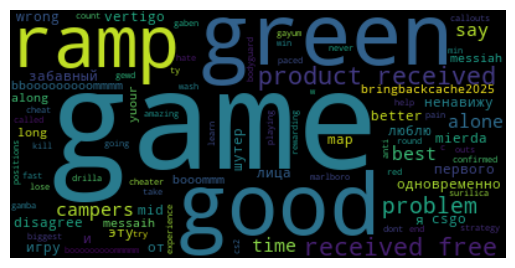

In [ ]:
# Combine all reviews into one single text
text = " ".join(i for i in df.reviews_processed)

# Create wordcloud from the combined reviews
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Sentiment Analysis

In [16]:
# Get the polarity for each review processed
df['polarity'] = df['reviews_processed'].apply(lambda x: TextBlob(x).sentiment[0])

In [17]:
# Predictions dataframe (Styled)
df.style.apply(
    func   = highlight_mismatch, 
    subset = ["polarity"]
)

,reviews_processed,recommendation,polarity
0,░░░░░░░██████╗░███████╗██████╗░,Recommended,0.000000
1,mierda,Not Recommended,0.000000
2,game good.,Recommended,0.150000
3,я ненавижу и люблю эту игру одновременно),Recommended,0.000000
4,забавный шутер от первого лица,Recommended,0.000000
5,csgo better. mid game best. vertigo best map disagree wrong. #bringbackcache2025,Recommended,0.266667
6,,Not Recommended,0.000000
7,product received free,Recommended,0.400000
8,green green what's problem green what's yuour problem green messiah along ramp messaih long ramp *~~booommm~~bbooooooooommmm~~booooooooommmmm*~~,Recommended,-0.170000
9,product received free,Recommended,0.400000
